In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\hemua\.spyder-py3\Data\combined-Data\final.csv")

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM2.5
0,14.9,21.6,8.8,1017.4,76,0.8,0.9,7.6,315.117083
1,14.7,21.6,10.2,1018.1,97,0.6,3.1,9.4,173.367083
2,15.0,16.8,13.6,1017.5,94,0.5,0.9,7.6,92.277917
3,9.8,17.6,6.4,1016.6,90,0.5,3.9,11.1,218.272500
4,10.1,14.5,7.2,1019.2,90,0.3,3.3,7.6,230.393750


<AxesSubplot:>

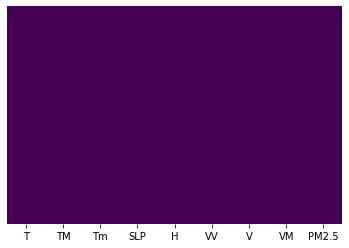

In [4]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

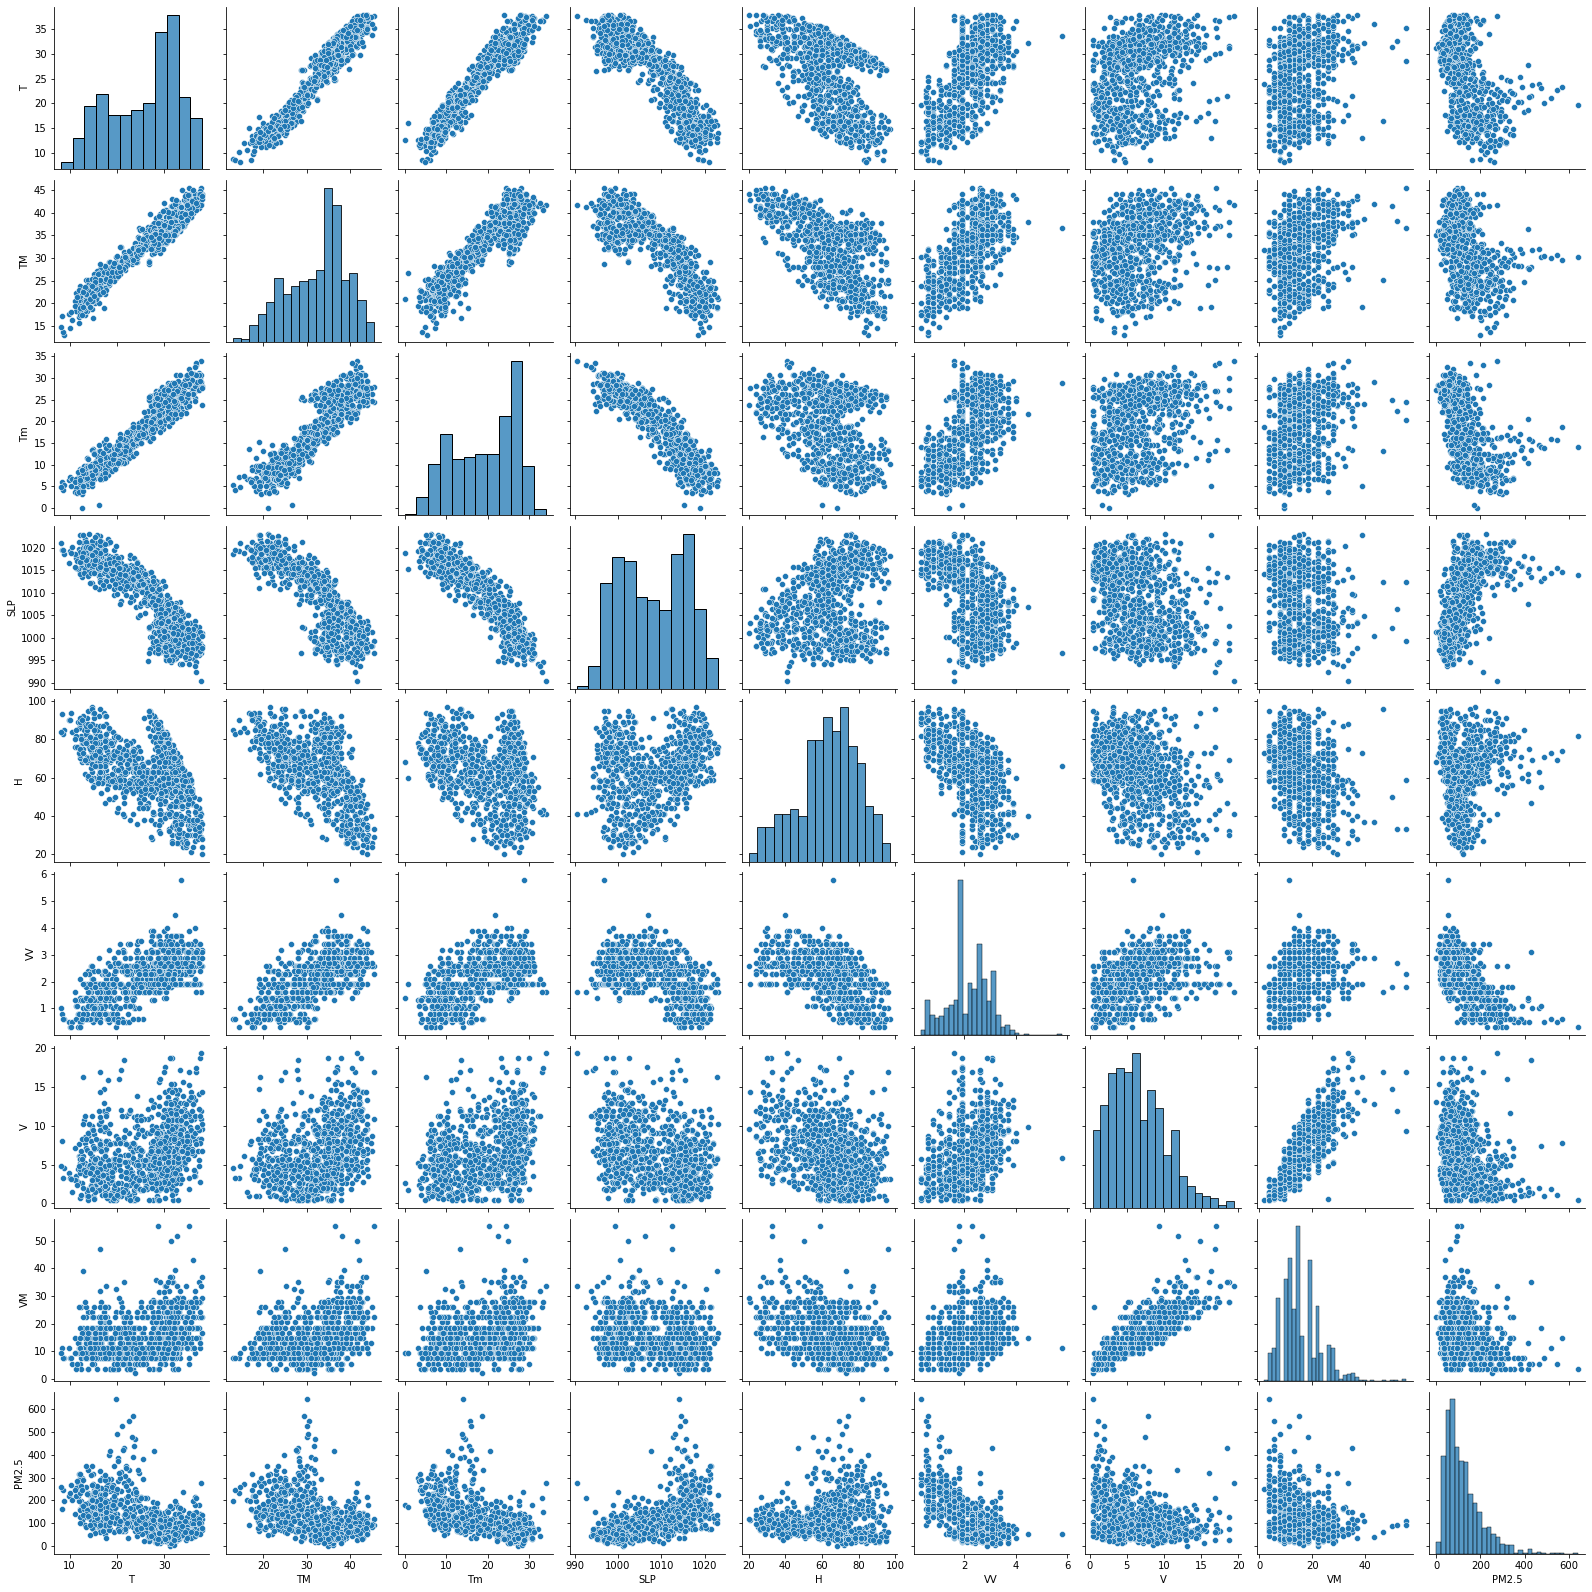

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM2.5
T,1.000000,0.963414,0.953700,-0.885899,-0.524588,0.656013,0.317151,0.278713,-0.535207
TM,0.963414,1.000000,0.888732,-0.830644,-0.598926,0.625076,0.292921,0.291130,-0.452797
Tm,0.953700,0.888732,1.000000,-0.916239,-0.302975,0.563107,0.310608,0.244637,-0.602654
SLP,-0.885899,-0.830644,-0.916239,1.000000,0.266543,-0.525836,-0.314371,-0.261835,0.597712
H,-0.524588,-0.598926,-0.302975,0.266543,1.000000,-0.529835,-0.338913,-0.363676,0.074007
VV,0.656013,0.625076,0.563107,-0.525836,-0.529835,1.000000,0.370010,0.316341,-0.617590
V,0.317151,0.292921,0.310608,-0.314371,-0.338913,0.370010,1.000000,0.823250,-0.329799
VM,0.278713,0.291130,0.244637,-0.261835,-0.363676,0.316341,0.823250,1.000000,-0.256096
PM2.5,-0.535207,-0.452797,-0.602654,0.597712,0.074007,-0.617590,-0.329799,-0.256096,1.000000


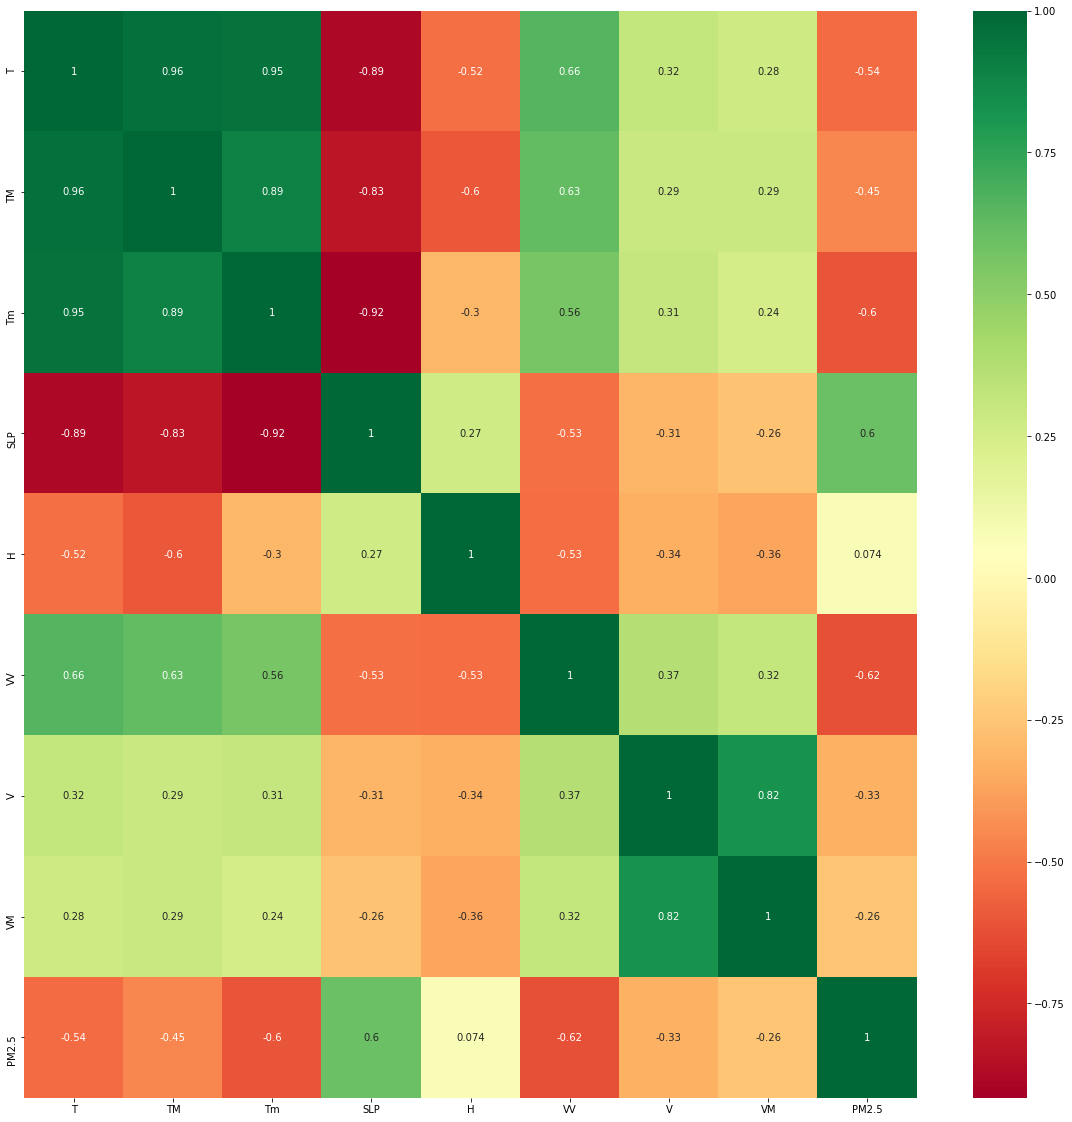

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,14.9,21.6,8.8,1017.4,76,0.8,0.9,7.6
1,14.7,21.6,10.2,1018.1,97,0.6,3.1,9.4
2,15.0,16.8,13.6,1017.5,94,0.5,0.9,7.6
3,9.8,17.6,6.4,1016.6,90,0.5,3.9,11.1
4,10.1,14.5,7.2,1019.2,90,0.3,3.3,7.6


In [13]:
print(model.feature_importances_)

[0.13310523 0.07942323 0.18384709 0.14096313 0.08295848 0.27304038
 0.06306023 0.04360222]


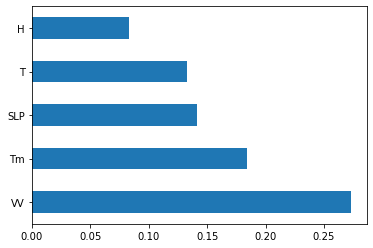

In [14]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

C:\Users\hemua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

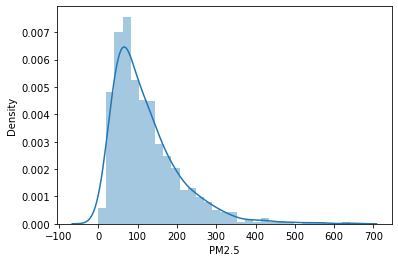

In [15]:
sns.distplot(y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
regressor=RandomForestRegressor()

In [19]:
RandomForestRegressor()

RandomForestRegressor()

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [22]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [23]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [24]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [25]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [26]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.4s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=100, mi

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.2s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.2s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.2s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.2s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.2s
[CV] n_estimators=1200, min_samples_split=100, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.3s
[CV] n_estimators=300, min_samples_split=

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   0.8s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   0.8s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.9s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.9s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.9s
[CV] n_estimators=900, min_samples_split

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.8s
[CV] n_estimators=900, min_samples_split=

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=100, min_samples

[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   0.3s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1200, min_sample

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   2.0s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.9s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=500, min_samples_split=5, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=500, min_samples_split=5

[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   1.4s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   1.3s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   1.3s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   1.3s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=800, min_samples_spl

[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=1100, min_samples_split=100, min_s

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  6.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [27]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [28]:
rf_random.best_score_

-2082.7281971775183

In [29]:
predictions=rf_random.predict(X_test)

C:\Users\hemua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

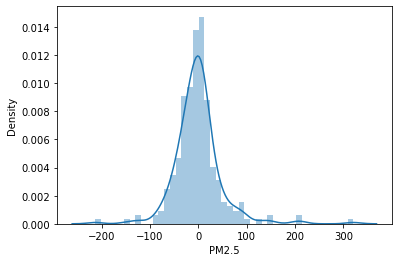

In [30]:
sns.distplot(y_test-predictions)

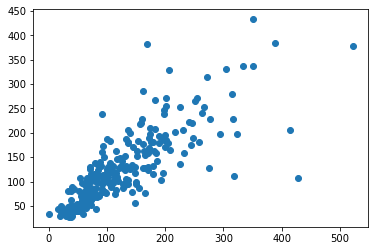

In [32]:
plt.scatter(y_test,predictions)

In [34]:
from sklearn import metrics

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 30.841073783057205
MSE: 2371.832342777994
RMSE: 48.70146140289831
